In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Importing General Estimates System Data

In [11]:
df = pd.read_csv('GES2015csv/accident.csv', low_memory=False)
df.head()

,CASENUM,LAND_USE,REGION,STRATUM,PJ,PSU,PSUSTRAT,VE_TOTAL,VE_FORMS,PVH_INVL,...,MINUTE_IM,EVENT1_IM,MANCOL_IM,RELJCT1_IM,RELJCT2_IM,LGTCON_IM,WEATHR_IM,MAXSEV_IM,NO_INJ_IM,ALCHL_IM
0,201510443751,1,1,4,3,2,3,1,1,0,...,57,59,0,0,1,1,4,0,0,2
1,201510443757,8,1,6,4,2,3,1,1,0,...,4,1,0,0,1,1,4,0,0,2
2,201510443760,8,1,4,4,2,3,2,2,0,...,3,12,1,0,3,1,1,0,0,2
3,201510443763,1,1,4,10,2,3,2,2,0,...,51,12,1,0,3,1,4,0,0,2
4,201510443802,1,1,4,2,2,3,1,1,0,...,30,30,0,0,1,1,4,0,0,2


## Is weather a factor in traffic accidents more often than not?

In [12]:
di = {1: 'Clear',
        2: 'Rainy',
        3: 'Other',
        4: 'Snowy',
        5: 'Other',
        6: 'Other',
        7: 'Other',
        8: 'Other',
        10: 'Cloudy',
        11: 'Snowy',
        12: 'Other',
        98: 'Other',
        99: 'Other'
}

df = df['WEATHER'].map(di) 
weather_conditions = df.value_counts().reset_index() #.rename_axis('condition_type').to_frame('# of Accidents')
weather_conditions.columns = ['Condition', 'count']

weather_conditions.head()

,Condition,count
0,Clear,38639
1,Cloudy,10082
2,Rainy,5726
3,Snowy,1393
4,Other,1238


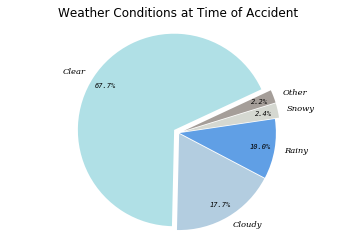

In [13]:
clrs = ['#b0e0e6','#b3cde0','#609fe5','#d5d8d1','#a59e99']
explode = (0.05, 0.01, 0.01, 0.05, 0.05)

fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(weather_conditions['count'],
        explode = explode,
        labels = weather_conditions['Condition'],
        colors = clrs,
        autopct = '%1.1f%%',
        pctdistance = 0.85,
        labeldistance = 1.1,
        startangle = 25,
        radius = 0.9,
        textprops={'size': 'smaller',
                'fontname': 'monospace',
                'fontstyle': 'italic'},
       )

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.setp(autotexts, size='x-small')
plt.setp(texts, fontname='serif')
plt.title('Weather Conditions at Time of Accident')

plt.show()

### Weather is not a factor for over two-thirds of traffic accidents.

## Are traffic accidents more likely to occur in 4-way stop intersections?

In [16]:
df = pd.read_csv('GES2015csv/accident.csv', low_memory=False)

di = {1: 'No Intersection',
        2: 'Four-Way',
        3: 'T-Intersection',
        4: 'Other',
        5: 'Roundabout',
        6: 'Roundabout',
        7: 'Other',
        10: 'Other',
        98: 'Other',
        99: 'Other'
}

df = df['TYP_INT'].map(di) 
intersection_type = df.value_counts().reset_index()
intersection_type.columns = ['intersection', 'count']

intersection_type.head()

,intersection,count
0,No Intersection,32458
1,Four-Way,14298
2,T-Intersection,5759
3,Other,4425
4,Roundabout,138


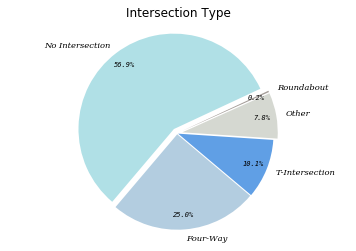

In [17]:
clrs = ['#b0e0e6','#b3cde0','#609fe5','#d5d8d1','#a59e99']
explode = (0.05, 0.01, 0.01, 0.05, 0.05)

fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(intersection_type['count'],
        explode = explode,
        labels = intersection_type['intersection'],
        colors = clrs,
        autopct = '%1.1f%%',
        pctdistance = 0.85,
        labeldistance = 1.1,
        startangle = 25,
        radius = 0.9,
        textprops={'size': 'smaller',
                'fontname': 'monospace',
                'fontstyle': 'italic'},
       )

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.setp(autotexts, size='x-small')
plt.setp(texts, fontname='serif')

plt.title('Intersection Type')
plt.show()

### Over half of all accidents occur in a location where there is no intersection.

## Are there more accidents during winter months or summer months?

In [18]:
df = pd.read_csv('GES2015csv/accident.csv', low_memory=False)
di = {1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
}
crash_byMonth = df['MONTH'].value_counts().reset_index().sort_values(by=['index'])
crash_byMonth.columns = ['month','count']
crash_byMonth.sort_values(by=['month'])
crash_byMonth['month'] = crash_byMonth['month'].map(di)

crash_byMonth.head()

,month,count
3,January,4949
10,February,4415
8,March,4564
11,April,4381
6,May,4707


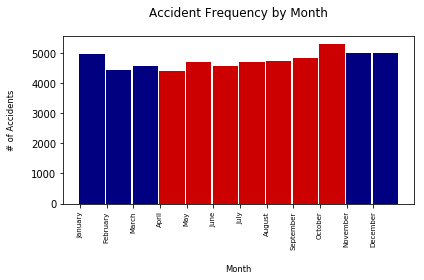

In [21]:
# set bar parameters
n_bars = 12
fig, ax = plt.subplots()
x_pos = np.arange(n_bars)
bar_width = 0.95
opacity = 1.0

# set color list
clrs = ['#000080','#000080','#000080','#cc0000','#cc0000','#cc0000',
        '#cc0000','#cc0000','#cc0000','#cc0000','#000080','#000080']

# build list of bars to chart
barlist = plt.bar(x_pos, crash_byMonth['count'], bar_width,
                 alpha=opacity,
                 color=clrs)

#  set chart title & lables 
plt.xlabel('Month', labelpad=15, fontsize='small')
plt.ylabel('# of Accidents', labelpad=15, fontsize='small')
plt.title('Accident Frequency by Month', pad=20, fontsize='large')

# set x-axis tick marks
plt.xticks(x_pos - 0.45,
                ('January','February','March','April','May','June',
                'July','August','September','October','November','December'),
                rotation=90,
                fontsize='x-small')

# plot
plt.tight_layout()
plt.show()

### The number of accidents does not vary significantly by month.

## Are accidents more likely to occur on the weekends?

In [22]:
df = pd.read_csv('GES2015csv/accident.csv', low_memory=False)
di = {1: 'Sunday',
        2: 'Monday',
        3: 'Tuesday',
        4: 'Wednesday',
        5: 'Thursday',
        6: 'Friday',
        7: 'Saturday'
}

crash_byDay = df['WKDY_IM'].value_counts().reset_index().sort_values(by=['index'])
crash_byDay.columns = ['day','count']
crash_byDay.sort_values(by=['day'])
crash_byDay['day'] = crash_byDay['day'].map(di)

crash_byDay.head()

,day,count
6,Sunday,6284
4,Monday,8330
2,Tuesday,8556
3,Wednesday,8465
1,Thursday,8703


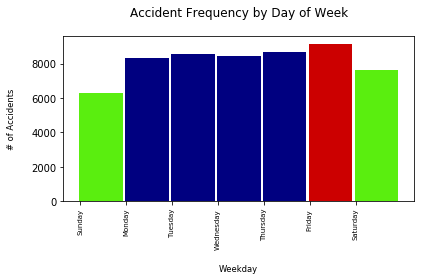

In [23]:
# set bar parameters
n_bars = 7
fig, ax = plt.subplots()
x_pos = np.arange(n_bars)
bar_width = 0.95
opacity = 1.0

# set color list
clrs = ['#5aee0f','#000080','#000080','#000080','#000080','#cc0000','#5aee0f']

# build list of bars to chart
barlist = plt.bar(x_pos, crash_byDay['count'], bar_width,
                 alpha=opacity,
                 color=clrs)

#  set chart title & lables 
plt.xlabel('Weekday', labelpad=15, fontsize='small')
plt.ylabel('# of Accidents', labelpad=15, fontsize='small')
plt.title('Accident Frequency by Day of Week', pad=20, fontsize='large')

# set x-axis tick marks
plt.xticks(x_pos - 0.45,
                ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'),
                rotation=90,
                fontsize='x-small')

# plot
plt.tight_layout()
plt.show()

### Accidents occur more often during the week. Fridays have more accidents, weekends have less.

## Are accidents more likely to occur during rush hours?

In [24]:
df = pd.read_csv('GES2015csv/accident.csv', low_memory=False)
crash_hr = df['HOUR_IM']

# sort accident frequency by hour
by_hour = crash_hr.value_counts().sort_index(axis=0)

by_hour.head()

0    1078
1     951
2     903
3     709
4     600
Name: HOUR_IM, dtype: int64

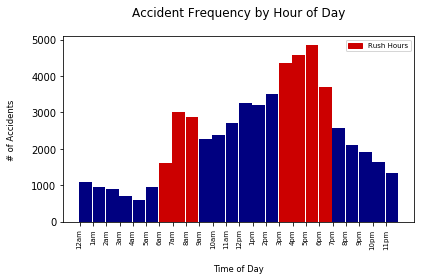

In [25]:
# set bar parameters
n_bars = 24
fig, ax = plt.subplots()
x_pos = np.arange(n_bars)
bar_width = 0.95
opacity = 1.0

# set color list
clrs = ['#000080','#000080','#000080','#000080','#000080','#000080',
        '#cc0000','#cc0000','#cc0000', # highlight AM rush hour
        '#000080','#000080','#000080','#000080','#000080','#000080',
        '#cc0000','#cc0000','#cc0000','#cc0000', # highlight PM rush hour
        '#000080','#000080','#000080','#000080','#000080']

# build list of bars to chart
barlist = plt.bar(x_pos, by_hour, bar_width,
                 alpha=opacity,
                 color=clrs)

#  set chart title & lables 
plt.xlabel('Time of Day', labelpad=15, fontsize='small')
plt.ylabel('# of Accidents', labelpad=15, fontsize='small')
plt.title('Accident Frequency by Hour of Day', pad=20, fontsize='large')

# set x-axis tick marks
plt.xticks(x_pos - 0.45,
                ('12am', '1am', '2am', '3am','4am', '5am',
                '6am', '7am','8am', '9am', '10am', '11am',
                '12pm', '1pm', '2pm', '3pm','4pm', '5pm',
                '6pm', '7pm','8pm', '9pm', '10pm', '11pm','12am'),
                rotation=90,
                fontsize='x-small')

# build legend
rush_hours = mpatches.Patch(color='#cc0000', label='Rush Hours')
plt.legend(handles=[rush_hours], fontsize='x-small')

# plot
plt.tight_layout()
plt.show()

### The frequency of accidents spikes during rush hours, especially the PM rush hour.